In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('drug200.csv')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Decision tree classifier from sklearn

In [5]:
# Divide the datafrm between target and the indeendant variables (features and label)
x = df.iloc[:,0:5];

In [6]:
# Need to translate strings into numbers
from sklearn.preprocessing import LabelEncoder

In [7]:
# Create different objects
sexe = LabelEncoder()
bp = LabelEncoder()
cholesterol = LabelEncoder()


In [8]:
# Create extra column in the features dataframe
# Transform var/strings by numbers using fit_transform

x['sexe_n'] = sexe.fit_transform(x['Sex'])
x['bp_n'] = bp.fit_transform(x['BP'])
x['cholesterol_n'] = cholesterol.fit_transform(x['Cholesterol'])

In [9]:
# Do the same for label
drug = LabelEncoder()
df['Drug_n'] = drug.fit_transform(df['Drug'])
y_n = df['Drug_n']

In [10]:
# Drop features columns (because useless)

x_n = x.drop(['Sex', 'BP', 'Cholesterol'], axis = 'columns')
x_n

,Age,Na_to_K,sexe_n,bp_n,cholesterol_n
0,23,25.355,0,0,0
1,47,13.093,1,1,0
2,47,10.114,1,1,0
3,28,7.798,0,2,0
4,61,18.043,0,1,0
...,...,...,...,...,...
195,56,11.567,0,1,0
196,16,12.006,1,1,0
197,52,9.894,1,2,0
198,23,14.020,1,2,1


In [11]:
y_n, x_n

(0      4
 1      2
 2      2
 3      3
 4      4
       ..
 195    2
 196    2
 197    3
 198    3
 199    3
 Name: Drug_n, Length: 200, dtype: int32,
      Age  Na_to_K  sexe_n  bp_n  cholesterol_n
 0     23   25.355       0     0              0
 1     47   13.093       1     1              0
 2     47   10.114       1     1              0
 3     28    7.798       0     2              0
 4     61   18.043       0     1              0
 ..   ...      ...     ...   ...            ...
 195   56   11.567       0     1              0
 196   16   12.006       1     1              0
 197   52    9.894       1     2              0
 198   23   14.020       1     2              1
 199   40   11.349       0     1              1
 
 [200 rows x 5 columns])

In [89]:
# Need to split data (train and test)

nb_train = round(0.8 * len(x_n))
nb_test = round(0.2 * len(x_n))
print('nb data train : ', nb_train)
print('nb data test : ', nb_test)

nb data train :  160
nb data test :  40


In [90]:
x_train, y_train = x_n.iloc[0:nb_train], y_n.iloc[0:nb_train]
x_test, y_test = x_n.iloc[nb_train:len(x_n)], y_n.iloc[nb_train:len(x_n)]

In [91]:
x_test.head()
len(y_train)

160

In [92]:
# Train the classifier
from sklearn import tree

In [100]:
model = tree.DecisionTreeClassifier()

In [102]:
model.fit(x_train, y_train) # can change criterion to entropy, but Gini is pretty popular for decision tree
# model is now ready to predict

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
# prediction of the score is one because data arent split
# need to use the dataset we want to predict here
model.score(x_test, y_test)

1.0

In [104]:
x_n.iloc[[0]]

,Age,Na_to_K,sexe_n,bp_n,cholesterol_n
0,23,25.355,0,0,0


In [105]:
# prediction for the first row 
print(model.predict(x_n.iloc[[150]]) == y_n.iloc[[150]])

150    True
Name: Drug_n, dtype: bool


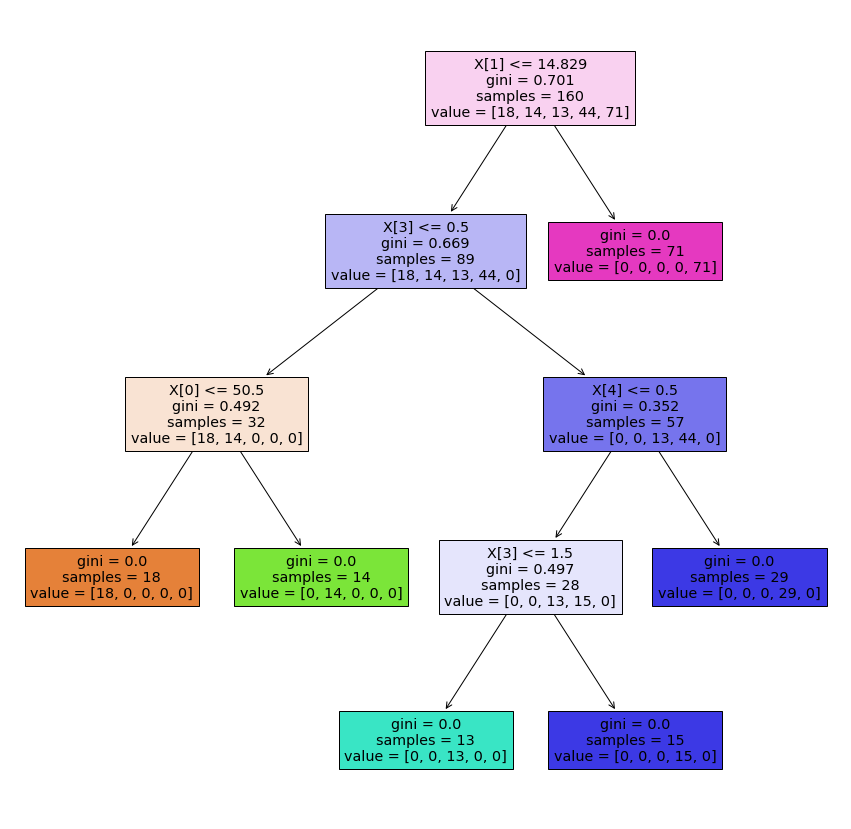

In [106]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
plot_tree(model, filled=True)
plt.show()